In [1]:
import numpy as np
from data_utils import get_imgs_masks, resize_imgs_masks, generate_patches_list, convert_patches_list
import os

path = os.path.join("input", "dataset", "*_NEW.png")
x, y = get_imgs_masks(path)

x = np.asarray(x, dtype=np.float32) / 255 
#y = np.asarray([i[:,:,0] for i in y], dtype=np.uint8)
y = np.asarray(y, dtype=np.uint8)
print(x.shape)


(20, 2547, 3396, 3)


In [5]:
from data_utils import split_to_patches, combine_patches, resize_imgs_masks
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

img = cv2.imread("1.png")
print((img.shape[0]-8) % (8-2*1))
#img = np.zeros((32, 32, 3), dtype=np.uint8)
print(img.shape)

patches = split_to_patches(img, 8, 1)
print(patches.shape)

res = combine_patches(patches, 8, 1, (32, 32))
cv2.imwrite("2.png", res)


0
(32, 32, 3)
(25, 8, 8, 3)


True

42 patches of shape (42, 512, 512, 3)
(2547, 3396, 3)
(2547, 3396, 3)


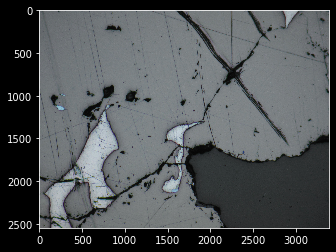

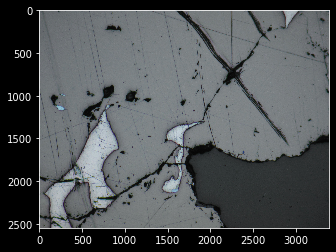

In [3]:
from data_utils import split_to_patches, combine_patches, resize_imgs_masks
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("input/dataset/Cpy-Sh-GL32.jpg")
height = img.shape[0]
width = img.shape[1]
p_size = 512
offset = 4

patches, new_size = split_to_patches(img, p_size, offset)
print("{n} patches of shape {s}".format(n=patches.shape[0], s=patches.shape))
result = combine_patches(patches, p_size, offset, (new_size[0], new_size[1]), (height, width))

plt.imshow(result)
plt.show()
plt.imshow(img)
plt.show()

print(img.shape)
print(result.shape)


Input shape (20, 2547, 3396, 3)

(4, 512, 512, 3)
(4, 512, 512, 3)


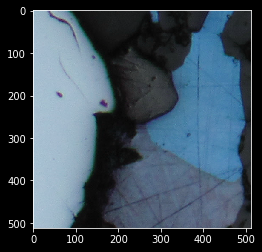

In [8]:
from generators import PatchGenerator
import matplotlib.pyplot as plt

batch_size = 4

print("Input shape {s}".format(s=x.shape))
xx, yy = next(PatchGenerator(x, y, 512, batch_size))
print()
print(xx.shape)
print(yy.shape)

for i in range(batch_size):
    plt.imshow(xx[i])

In [5]:
from data_utils import resize_imgs_masks, make_patches
from data_utils import reconstruct_from_patches
import cv2
from PIL import Image
import numpy as np
from matplotlib.image import imread

#img = cv2.imread("input/dataset/Cpy-Sh-GL32.jpg")
img = np.array(Image.open("input/dataset/Cpy-Sh-GL32.jpg"))
print(img.shape)
images = []
images.append(img)
#print(type(images))
#print(type(img))

res_images, res_masks = resize_imgs_masks(images, images, patch_size=256)
print(res_images[0].shape)
Image.fromarray(res_images[0]).save("11.jpeg")
#cv2.imwrite("1.jpeg", res_images[0])
patches = make_patches(res_images[0])

print(patches.shape)

reconstructed = reconstruct_from_patches(patches, (res_images[0].shape[0], res_images[0].shape[1]))
print(reconstructed.shape)

cv2.imwrite("2.jpeg", reconstructed)

#plot_patches(patches, (res_images[0].shape[0], res_images[0].shape[1]), 256)

#for x in res_images:
#   cv2.imwrite("1.jpeg", x) 

(2547, 3396, 3)
(2560, 3584, 3)
(140, 256, 256, 3)
(2560, 3584, 3)


True

In [19]:
import data_utils
from PIL import Image
import numpy as np
import cv2

img = np.array(Image.open("input/dataset/Cpy-Sh-GL32.jpg"))
print(img.shape)

k = pow(2, 2)

height = img.shape[0]
width = img.shape[1]
new_height = (height // k + 1) * k
new_width = (width // k + 1) * k

print("H: {h} W: {w}".format(h=new_height, w=new_width))

cv2.imwrite("2.JPEG", img)
cv2.imwrite("1.JPEG", np.pad(img, ((0, new_height - height), (0, new_width - width), (0, 0)), 'constant'))


(2547, 3396, 3)
H: 2548 W: 3400


True

In [1]:
import numpy as np

h = 2547
w = 3400

k = 4

print(h / k)
print(w / k)

h1 = (np.ceil(h / k).astype('int')) * k
w1 = (np.ceil(w / k).astype('int')) * k

print(h1)
print(w1)

636.75
850.0
2548
3400


In [1]:
import os
import train

path = os.path.join("input", "dataset", "*_NEW.png")
train.train(num_classes=4, num_layers=2, epochs=20, path=path)


Using TensorFlow backend.


Found 20 images and 20 masks
Old height and width: 2547 : 3396
New height and width: 2548 : 3400
After resize 20 images and 20 masks
Training: (14, 3400, 2548, 3) images and (14, 3400, 2548) masks
Validation: (6, 3400, 2548, 3) images and (6, 3400, 2548) masks


MemoryError: 

In [1]:
import utils

In [4]:
utils.visualize_segmentation_dataset("input/dataset", 4)

Press any key to navigate. 
Found the following classes [0 1 2 3]


In [1]:
import cv2
from utils import compare_masks_red

mask1 = cv2.imread("input/dataset/Py-Cpy-Sh-BR-GL2_NEW.png")
mask2 = cv2.imread("input/dataset/Py-Cpy-Sh-BR-GL27_NEW.png")

result = compare_masks(mask1, mask2)

cv2.imshow("mask", cv2.resize(result, (0, 0), fx=0.2, fy=0.2))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
from utils import compare_masks_rgb
import numpy as np

mask1 = cv2.imread("input/dataset/Py-Cpy-Sh-BR-GL2_NEW.png")
mask2 = cv2.imread("input/dataset/Py-Cpy-Sh-BR-GL27_NEW.png")

max1 = np.amax(mask1)
max2 = np.amax(mask2)

#result = compare_masks_rgb(np.multiply(mask1, 255 / max1), np.multiply(mask2, 255 / max2))
result = compare_masks_rgb(mask1, mask2)

cv2.imshow("mask", cv2.resize(result, (0, 0), fx=0.2, fy=0.2))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
from utils import visualize_segmentation_result
from data_utils.load_data import get_imgs_masks

imgs, masks = get_imgs_masks("/Users/Alexey/Desktop/Geology/input/dataset/*_NEW.png")

print('!')

#visualize_segmentation_result(imgs, masks)


!


In [2]:
print(masks[0].shape)

(2547, 3396, 3)


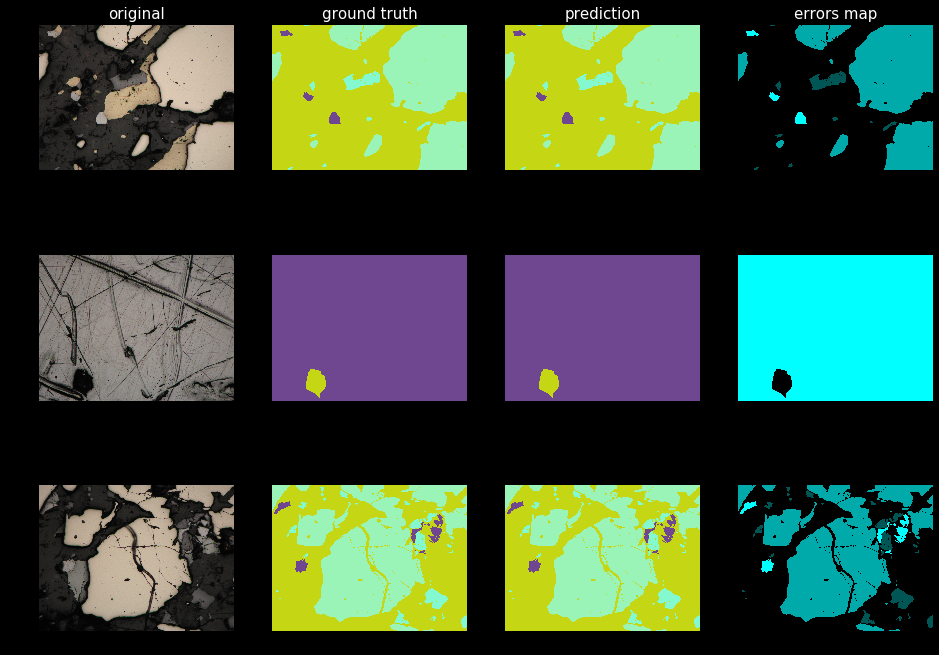

In [2]:
visualize_segmentation_result(imgs, masks, preds=masks, nm_img_to_plot=3)
#visualize_segmentation_result(imgs, masks, nm_img_to_plot=3)

In [1]:
import train

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

ModuleNotFoundError: No module named 'cv2'